<center> <h1> Implémentation et parcours de graphes </h1></center>

L'objectif de ce TP est :
* de créer plusieurs implémentations d'une structure de graphe
* de réaliser des parcours de graphe (BFS, DFS).

Nous avons vu dès le cours sur les structures et interfaces comment modéliser simplement un graphe et le parcourir. Nous proposons donc de revenir ici sur cette méthode et de l'enrichir avec d'autres manières de créer et de parcourir un graphe.

Nous prendrons comme exemple générique le graphe $\Gamma$ suivant :

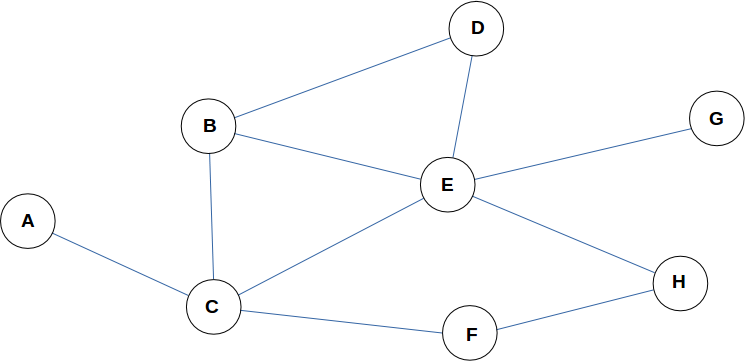




## 1. Par matrices

Dans la séquence 4 (Structures de données), nous avons proposé la modélisation d'un graphe comme une liste de listes de sommets adjacents :

In [ ]:
GammaMatrice = [
    [2],             # voisins de 0 = A
    [2, 3, 4],       # voisins de 1 = B
    [0, 1, 4, 5],    # voisins de 2 = C
    [1, 4],          # voisins de 3 = D
    [1, 2, 3, 6, 7], # voisins de 4 = E
    [2, 7],          # voisins de 5 = F
    [4],             # voisins de 6 = G
    [4, 5],          # voisins de 7 = H
]


### 1.1 DFS itératif

On a ensuite pu voir le parcours en profondeur, communément appelé DFS (*Depth-First Search*).

Rappeler le principe de ce parcours.

Ici, que donnera le parcours en profondeur d'abord de $\Gamma$ en partant du sommet A ?
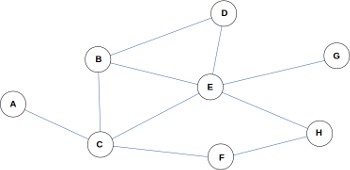

On redonne donc le code vu en séquence 4 :

In [ ]:
def visiter(sommet):
    print(sommet, end=' ')
    # rappel : le paramètre end=' ' permet de finir par un espace au lieu d'un retour à la ligne
    
def parcoursDFSIteratif(grapheMatrice, sommetDepart):
    nombreSommets = len(grapheMatrice)
    prochainsSommets = [sommetDepart]
    dejaVu = [False for k in range(nombreSommets)]
    while not(len(prochainsSommets) == 0):
        k = prochainsSommets.pop() # supprime le dernier élément et le stocke en mémoire dans la variable k
        if dejaVu[k]:
            continue # Permet de reprendre la boucle sans exécuter ce qui suit
        dejaVu[k] = True
        visiter(k)
        for s in grapheMatrice[k]:
            prochainsSommets.append(s)
            

In [ ]:
parcoursDFSIteratif(GammaMatrice,0)


À quelle structure vue en terminale correspond la liste `prochainsSommets` ci-dessus ?

### 1.2 DFS récursif

Implémenter ce parcours à l'aide d'une fonction récursive.

In [ ]:
def parcoursDFSRecursif(grapheMatrice, sommetAExplorer, dejaVu):
    return dejaVu


In [ ]:
parcoursDFSRecursif(GammaMatrice, 0, [])


On peut mesurer ici l'intérêt de la programmation récursive par rapport à la programmation itérative.

### 1.3 BFS itératif

Enfin, nous avons abordé le parcours en largeur d'abord, dit BFS (breath-first search).

Rappeler le principe de ce parcours.

Ici, que donnera le parcours en largeur d'abord de $\Gamma$ en partant du sommet A ?

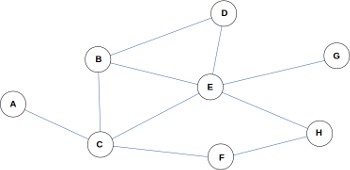

In [ ]:
def parcoursBFSIteratif(grapheMatrice, sommetDepart):
    nombreSommets = len(grapheMatrice)
    prochainsSommets = [sommetDepart]
    dejaVu = [False for k in range(nombreSommets)]
    while not(len(prochainsSommets) == 0):
        k = prochainsSommets.pop(0)
        if dejaVu[k]:
            continue
        dejaVu[k] = True
        visiter(k)
        for s in grapheMatrice[k]:
            prochainsSommets.append(s)
            

In [ ]:
parcoursBFSIteratif(GammaMatrice, 0)


À quelle structure vue en terminale correspond la liste `prochainsSommets` ci-dessus ?

### 1.4 BFS récursif

Implémenter ce parcours à l'aide d'une fonction récursive.

In [ ]:
def parcoursBFSRecursif(grapheMatrice, file, dejaVu):
    # si la file n'est pas vide
        # alors on récupère le 1er sommet dans la file
        # on l'enlève de la file
        # on vérifie s'il est dans la liste dejaVu
        # si ce n'est pas le cas :
            # on l'ajoute dans la liste dejaVu
            # on ajoute tous ses sommets adjacents dans la file
        # on rappelle la fonction de façon récursive :
        dejaVu = parcoursBFSRecursif(grapheMatrice, file, dejaVu)
    
    # on renvoie la liste dejaVu    
    return dejaVu


In [ ]:
parcoursBFSRecursif(GammaMatrice,[0], [])


## 2. Dictionnaire

Dans l'exemple précédent, chaque sommet devait être associé à un numéro.

On peut aussi décrire le graphe à l'aide d'un dictionnaire :
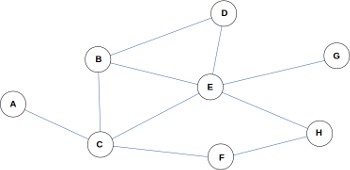

In [ ]:
GammaDictionnaire = {
    'A' : ['C'],
    'B' : ['C', 'D', 'E'],
    'C' : ['A', 'B', 'E', 'F'],
    'D' : ['B', 'E'],
    'E' : ['B', 'C', 'D', 'G', 'H'],
    'F' : ['C', 'H'],
    'G' : ['E'],
    'H' : ['E', 'F']
}


Implémenter le parcours DFS en récursif à l'aide de ce dictionnaire.

In [ ]:
def parcoursDFSRecursifDictionnaire(grapheDictionnaire, sommetAExplorer, dejaVu):
    return dejaVu


In [ ]:
parcoursDFSRecursifDictionnaire(GammaDictionnaire, 'A', [])

Qu'a-t-on fait évoluer dans l'implémentation de cet algorithme par rapport à la version pour matrices ?

Faire le test avec `parcoursDFSRecursif`.

In [ ]:
parcoursDFSRecursif(GammaDictionnaire,'A', [])


De même, on peut tester pour le parcours BFS :

In [ ]:
parcoursBFSRecursif(GammaDictionnaire, ['A'], [])


## 3. Classe Sommet

Il reste à voir l'implémentation d'une classe Sommet pour un graphe, qui permet de construire un graphe comme une série de sommets qui se font référence les uns aux autres.

Implémenter cette classe qui devra contenir comme attributs :
* Un nom
* Un dictionnaire de sommets adjacents

Et comme méthodes :
* L'ajout et la suppression d'un sommet adjacent
* L'ajout d'une liste de sommets adjacents
* Le parcours du graphe en profondeur d'abord à partir de ce sommet
* Le parcours du graphe en largeur d'abord à partir de ce sommet


In [ ]:
class Sommet:
    def __init__(self, nom):
        pass
        
    def ajoutSommetAdjacent(self, nouveauSommet):
        pass
            
    def ajoutListeSommetsAdjacents(self, listeSommets):
        pass
        
    def suppressionSommetAdjacent(self, nomSommet):
        pass
    
    def parcoursDFS(self):
        pass
    
    def parcoursBFS(self):
        pass
    

In [ ]:
# Création des sommets
A = Sommet("A")
B = Sommet("B")
C = Sommet("C")
D = Sommet("D")
E = Sommet("E")
F = Sommet("F")
G = Sommet("G")
H = Sommet("H")


In [ ]:
# Création des arêtes
A.ajoutListeSommetsAdjacents([C])
B.ajoutListeSommetsAdjacents([C,D,E])
C.ajoutListeSommetsAdjacents([A,B,E,F])
D.ajoutListeSommetsAdjacents([B,E])
E.ajoutListeSommetsAdjacents([B,C,D,G,H])
F.ajoutListeSommetsAdjacents([C,H])
G.ajoutListeSommetsAdjacents([E])
H.ajoutListeSommetsAdjacents([E,F])


**Exercice :**

Implémenter le labyrinthe suivant sous forme de graphe et faire trouver la sortie à un algorithme, en profondeur d'abord puis en largeur d'abord.

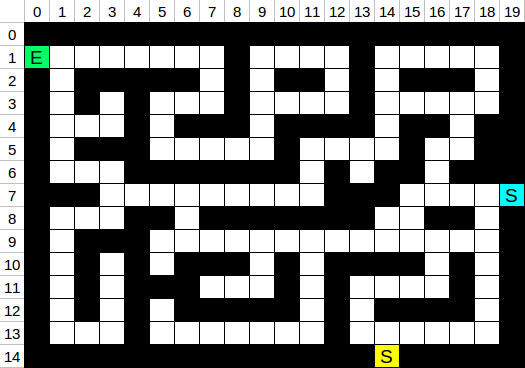

*Remarque* : l'implémentation du graphe est assez longue, partagez le travail avec un ou plusieurs camarades !